# Waze Customer Chrun Prediction Project

- **Name: Vishnu Venugopal**
- **Role : Data Analyst | Organization : Waze (Simulated)**
- **Tools Used: Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn, Statsmodels, Plotly, SciPy**

## 1. Project Overview

* **Objective:** Predict monthly user churn for Waze and identify the key factors contributing to churn.
* **Business Impact:** Helps Waze improve user retention by identifying at-risk users for targeted interventions.
* **Approach:** Applied the PACE workflow to perform data cleaning, EDA, statistical testing, and machine learning.

## 2. The PACE Workflow

### Plan Stage

#### **2.1 Project Questions**
* Who is most likely to churn?
* Why do users churn?
* When do users churn?

#### 2.2 **Data Source**
This project uses a dataset called `waze_dataset.csv`. It contains synthetic data created for this project in partnership with Waze. 

The dataset contains:

**14,999 rows** – each row represents one unique user 
**13 columns**

| Column Name              | Type   | Description                                                                 |
|--------------------------|--------|-----------------------------------------------------------------------------|
| ID                       | int    | A sequential numbered index                                                 |
| label                    | obj    | Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month |
| sessions                 | int    | The number of occurrences of a user opening the app during the month       |
| drives                   | int    | An occurrence of driving at least 1 km during the month                     |
| device                   | obj    | The type of device a user starts a session with                             |
| total_sessions           | float  | A model estimate of the total number of sessions since a user has onboarded |
| n_days_after_onboarding  | int    | The number of days since a user signed up for the app                       |
| total_navigations_fav1   | int    | Total navigations since onboarding to the user’s favorite place 1          |
| total_navigations_fav2   | int    | Total navigations since onboarding to the user’s favorite place 2          |
| driven_km_drives         | float  | Total kilometers driven during the month                                    |
| duration_minutes_drives  | float  | Total duration driven in minutes during the month                           |
| activity_days            | int    | Number of days the user opens the app during the month                      |
| driving_days             | int    | Number of days the user drives (at least 1 km) during the month             |



### Analyze Stage

In [208]:
# Importing packages for data manipulation
import pandas as pd
import numpy as np

# Importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in the data frame
pd.set_option('display.max_columns', None)

In [209]:
# Loading the Waze the dataset
df0 = pd.read_csv("waze_dataset.csv")

### 3. Data Exploration PART 1

- Initial data preview (head, shape, info)
- Datatypes
- Outliers
- Missing values
- Duplicates
- Key observations about data distribution

#### **3.1 Initial Data Overview and Summary Statistics**

In [210]:
# Display the first 5 rows of the dataset
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [211]:
# Size of the dataset
df0.size

194987

In [212]:
# Shape of the dataset
df0.shape

(14999, 13)

In [213]:
# Information about the dataset dtypes
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [214]:
# Find the duplicate rows, if any, in the dataset
df0.duplicated().sum()

np.int64(0)

In [215]:
# Missing values in the dataset
df0.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [216]:
# Desctription of the dataset
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


1. The dataset has **14999** columns and **13** columns.
2. The size of the dataset is **194987**.
3. There are 3 dtypes of variables in this dataset:
    - `label` and `device` are of type`object`.*(Most likely categoricals of interest)*
    - `total_sessions`, `driven_km_drives` and `duration_minutes_drives` are of type `float64`.
    - The rest of the variable are of type `int64`
4. There are **no duplicate** rows in the dataset. 
5. There are **700** missing values in the `label` columns. *(to be investigated and actioned during a later stage)*
6. Possible outliers in `driven_km_drive` and `duration_minutes_drives` columns. *(to be investigated and actioned during a later stage)*

---

#### **3.2 Information on the Categorical Variables**

In [217]:
# More information on the categorical columns
print(f'Labels : {df0['label'].unique()}'
      f'\nDevices : {df0["device"].unique()}')

Labels : ['retained' 'churned' nan]
Devices : ['Android' 'iPhone']


1. `label` : This column has 2 variable pertaining to **customer retention** i.e., `churned` or `retained`. (*Please note that, at this stage of analysis, there are **null/nan** values in the `label` column which will actioned appropriately in the next stage*)
2. `device` : This column has 2 variables pertaining to the type of device i.e., `iPhone`, `Android`.

---

#### **3.3 Information on Outliers in the dataset**

In [218]:
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


1. The column `driven_km_drives` has a min value of **~60 kms** and a  max value of **~21,183 kms** with a mean of **~4,039 kms**, which indicates possibility of outliers in this column. 
2. The column `duration_minutes_drives` also seems to indicate possibility of outliers as the mean of `duration_minutes_drives` is **~1860 minutes** and the max value of this column is **~15851 minutes**.
---

#### **3.4 Information on the Missing Values**

In [219]:
# Isolating the rows with null values:
null_df0 = df0[df0['label'].isnull()]
not_null_df0 = df0[~df0['label'].isnull()]

# Display summary stats of rows with null values.
null_df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [220]:
# Display summary stats of rows with NOT null values.
not_null_df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [221]:
# Percentage ratio of missing vs not_missing values 
# compared against the type two types of devices.
print(f'Percentage Device type with Missing Labels : {round(null_df0['device'].value_counts(normalize=True)*100,2)}'
      f'\n\nPercentage Device type without Missing Labels :{round(not_null_df0['device'].value_counts(normalize=True)*100,2)}'
      f'\n\n Percentage Device type in the full dataset : {round(df0['device'].value_counts(normalize=True)*100,2)}')


Percentage Device type with Missing Labels : device
iPhone     63.86
Android    36.14
Name: proportion, dtype: float64

Percentage Device type without Missing Labels :device
iPhone     64.52
Android    35.48
Name: proportion, dtype: float64

 Percentage Device type in the full dataset : device
iPhone     64.48
Android    35.52
Name: proportion, dtype: float64


1. First, I isolated and divided the dataset **`null_df`** vs. **`not_null_df`**, corresponding to the **missing** vs. **not missing** `label` respectively.
2. Then I compared the summary statistics of the observation with **missing retention lables** with those that are **not missing any values**.
    - This reveals nothing remakable.(*The **mean** and the **standard deviation** are fairly consistent between the two groups.*)
3. Further, I compared the ratio of `device` types (i.e., `iPhone`, `Android`) with the `null_df0`, `not_null_df0` and the full dataset, `df0`.
    - Found that the missing values by each device is consistent with their representation in the overall dataset.
    - There is nothing to suggest a non-random cause of the missing data.

    ---

#### **3.5 Key Observations about the data distribution:**

In [222]:
# Calculating counts of churned vs retained users in the dataset
print(f'Count of Churned Users : {df0['label'][df0['label'] == 'churned'].count()} ' 
      f'which is {round(df0['label'][df0['label'] == 'churned'].count()/df0['label'].count()*100,2)}% of the dataset')

print(f'Count of Retained Users : {df0['label'][df0['label'] == 'retained'].count()} '
      f'which is {round(df0['label'][df0['label'] == 'retained'].count()/df0['label'].count()*100,2)}% of the dataset')

Count of Churned Users : 2536 which is 17.74% of the dataset
Count of Retained Users : 11763 which is 82.26% of the dataset


In [223]:
# Comparing medians of each variable for churned vs retained users. 
df0.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [224]:
# Making df0 as the unaltered version of the dataset.df0
# Creating a copy of df0 and storing it in a new dataframe 'df' which will be hence used for manipulation.
df = df0.copy()   

In [225]:
# Adding a new column called 'km_per_drive'
df['km_per_drive'] = df['driven_km_drives']/df['drives']

# Calculating the median of 'km_per_drive' for churned vs retained users.
median_km_per_drive = df.groupby('label')[['km_per_drive']].median(numeric_only=True)
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


In [226]:
# Adding new column called 'km_per_driving_day'
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# Calculating the median of 'km_per_driving_day' for churned vs retained users.
median_km_per_driving_day = df.groupby('label')[['km_per_driving_day']].median(numeric_only=True)
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [227]:
# Adding new column called 'drives_per_driving_day'
df['drives_per_driving_day'] = df['drives']/df['driving_days']

# Calculating the median of 'drives_per_driving_day' for churned vs retained users.
median_drives_per_driving_day = df.groupby('label')[['drives_per_driving_day']].median(numeric_only=True)
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


In [228]:
# Class imbalance ratio by count
df.groupby('label')['device'].value_counts()

label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: count, dtype: int64

In [229]:
# Class imbalance ratio by percentage
df.groupby('label')['device'].value_counts(normalize=True)*100

label     device 
churned   iPhone     64.865931
          Android    35.134069
retained  iPhone     64.439344
          Android    35.560656
Name: proportion, dtype: float64

1. This dataset contain **~82.26%** of **retained users** and **~17.74%** of **churned users**. 
2. Comparing the **medians** of each variable for `churned` and `retained` users, we see that(*Note: **Median** was used instead of **mean** as we did not want the **outlier** seen above, to unduly affect the portrayal of a typical user. Mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values.*):
    * Users who `churned` averaged **~3** more `drives` than the`retained` users.*(50 vs. 47 drives)* during the last month, but at the same time, these `retained` users had used the  Waze app *(`activity_days`)* **more than twice** as many days as `churned` users in the same period. *(8 vs. 17 days)*
    * Users who `churned` drove **~200 kms***(`driven_km_drives`)* and **~2.5 hours***(`duration_minutes_drives`)* more than the `retained` users during the last month. 
>  * It seems that churned users had more drives in fewer days, and their trip were farther and longer in duration. Perhaps this is suggestive of a user profile.    


3. I created few new variable (columns) for further exploration using the median:
    * `km_per_drive`: The `retained` user drove about **~1 km** more than the `churned` user. 
    * `km_per_driving_day`: The`churned` user drove **~698 kms** each day, which is **~240%** the per-drive-day distance of `retained` user.
    * `drives_per_driving_day`: The `churned` user has a similarly disproportionate *(**~246%** more)* number of drives-per-day compared to `retained` users.

> 4. The ratio of `iPhone` users and `Android` users is consistent between the `churned` group (*~62% vs. ~35%*) and the `retained` group, and those ratios are both consistent with the ratio found in the overall dataset.

#### **3.6 Initial EDA Summary Overview:**
* It is clear from the above figures that, regardless of whether a user `churned` or not, the users represented in this data are serious drivers! 
* It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data—and in particular the sample of `churned` users—contains a high proportion of long-haul truckers.
* In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. 
* It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

---

---

### 4. Data Exploration and Cleaning PART 2
- Fixing data types *(if needed)*
- Handling nulls/missing values *(if any)*
- Handling outliers *(if any)*
- Removing or encoding irrelevant features
- Brief rationale for key decisions

1. Identify the variables.
2. Out of the 13 columns the `ID` columns can be dropped as it is of no productive use for analysis. 
2. Handle the **700** missing rows.
3. Encoding `label` and `device` variables.

In [230]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778


#### **4.1 Identifying the applicable variables/columns for analysis**
* Since we are interested in user churn, the `label` column is essential.
* Besides `label`, variables that tie to the user behavior will be the most applicable. So all variables except `ID` ties to the user behavior.
* `ID` can be dropped from the analysis since we are not interested in identifying a particular user. Moreover, `ID` does not provide meaningful information about the churn. *(unless `ID` is assigned based on user sign-up time. But in the simulation, we will consider the latter)*

**Variable Definition:**
- `label` - Categorical Variable (Target Variable)
- `sessions` - Continuous Variable (int)
- `drives` - Continuous Variable (int)
- `total_sessions` - Continuous Variable (float)
- `n_days_after_onboarding` - Continuous Variable (int)
- `total_navigation_fav_1` - Continuous Variable (int)
- `total_navigation_fav_2` - Continuous Variable (int)
- `driven_km_drives` - Continuous Variable (float)
- `duration_minutes_drives` - Continuous Variable (float)
- `activity_days` - Continuous Variable (int)
- `driving_days` - Continuous Variable (int)
- `device` - Categorical Variable

---

#### **4.2 Handling nulls/missing values**

Earlier, we identified 700 missing values in the `label` columns.

If the missing data are missing completely at random (MCAR), meaning that the reason for missingness is independent of the data values themselves, we can proceed with a complete-case analysis by removing the rows with missing values. Otherwise, we will need to investigate the root cause of the missingness and make sure it won't interfere with the statistical inference and modeling. 

In this dataset, the missing values will skew the data as `label` is our target variable of interest. So we will have to delete the nulls. 

---

#### **4.3 Handling Outliers**

Earlier, we identifies two possible variables with outliers, `driven_km_drives` and `duration_minutes_drives`.

**Thoughts on some ways to confirm and identify outliers:**
1. Use `numpy` function to investigate the `mean()` and `median()` of the data and understand the range of data values.
2. Use a **boxplot** to visualize the distribution of the data.

Thoughts on the handling of the outlier, if identified:
1. There are three main options for dealing with outliers:
    * Keeping them as they are :  I have kept a back up unaltered dataframe called `df0` for this purpose. If I want to do further EDA/Analysis or for a dataset you are preparing for a model that is resistant to outliers. 
    * Deleting them : If identified that these outliers are mistakes, typos or errors and the dataset will be used for modeling or maching learning, then deleting may be required. 
    * Reassigning them : If the dataset is small and/or the data will be userd for modeling or machine learning, I could replace the outliers with new values that aligns with the objective.

    ---

#### **4.4 Visualizing the data distibution:**
* Boxplot to help determine outliers and where the bulk of the data points reside in terms of `drive`, `session` and all other continuous numeric variables. 
* Histogram to understand the distribution of variables
* Scatterplot to visualize relationships betweeen variables
* Bar charts to communicate levels and quantities, especially for categorical information


In [231]:
# Helper function to render a boxplot since it will be used multiple times:
def boxplotter(data, x, **kwargs):
    plt.figure(figsize=(12,4))
    sns.boxplot(data=data, x=x, fliersize=1,**kwargs)
    plt.title(f'{x.capitalize()} Boxplot')
    plt.show();

In [232]:
# Helper function to render a histogram since it will be used multiple times:
def histogrammer(data, x, median_text = True, **kwargs):
    median = round(df[x].median(),1)                         # Calculate the median
    plt.figure(figsize=(12,4))                               # Set the figure size
    ax = sns.histplot(data=data, x=x, kde=True, **kwargs)     # Plot the histogram
    plt.axvline(median, color = 'r', linestyle = '--')       # Plot the median line
    if median_text == True:                                  # Add median text unless set to False
        ax.text(0.20, .95, f'median = {median}', color='r',
                ha = 'left', va = 'top', transform = ax.transAxes)
    else:
        print('Median: ', median)
    plt.title(f'{x.capitalize()} Histogram');

##### **4.4.1. The number of occurences of a user opening the app during the month : `sessions`**

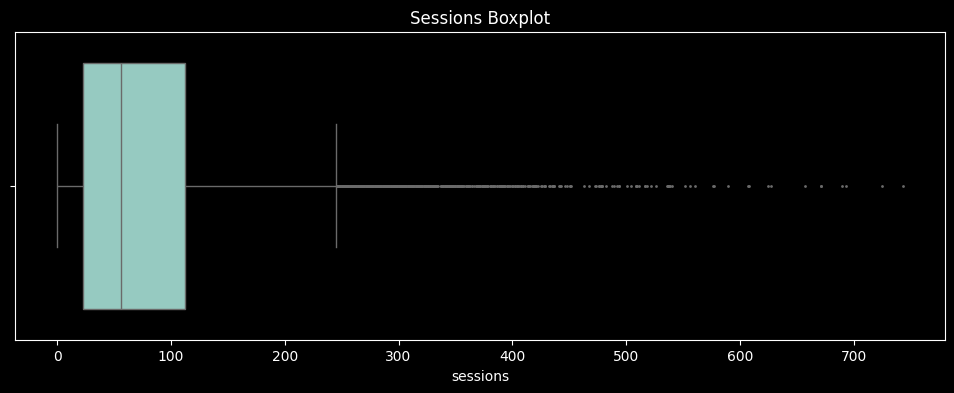

In [233]:
# Boxplot of sessions
boxplotter(df, 'sessions')

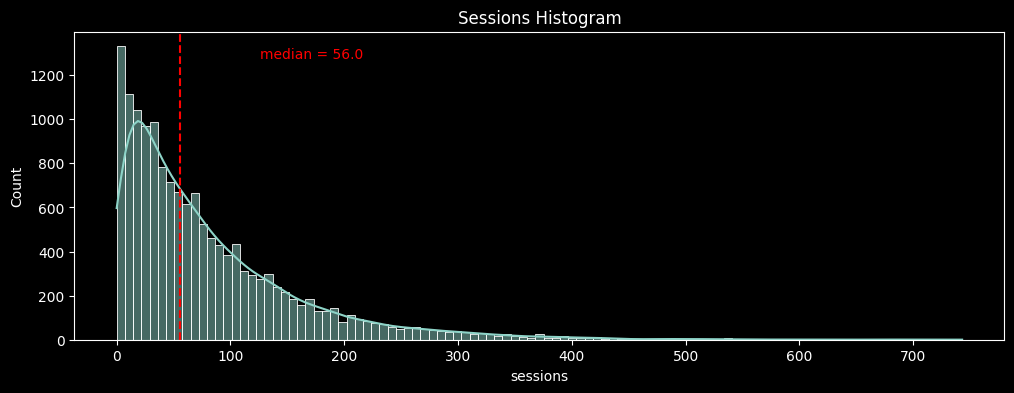

In [234]:
# Histogram of sessions
histogrammer(df, 'sessions')

* As seen above, the `sessions` variable is a **right-skewed distribution** with half of the observation having **56 or fewer** `sessions`. 
* However, as indicated by the boxplot, some users have more than **700** `sessions`.
---

##### **4.4.2. An occurance of driving at least 1 km during the month: `drives`** 

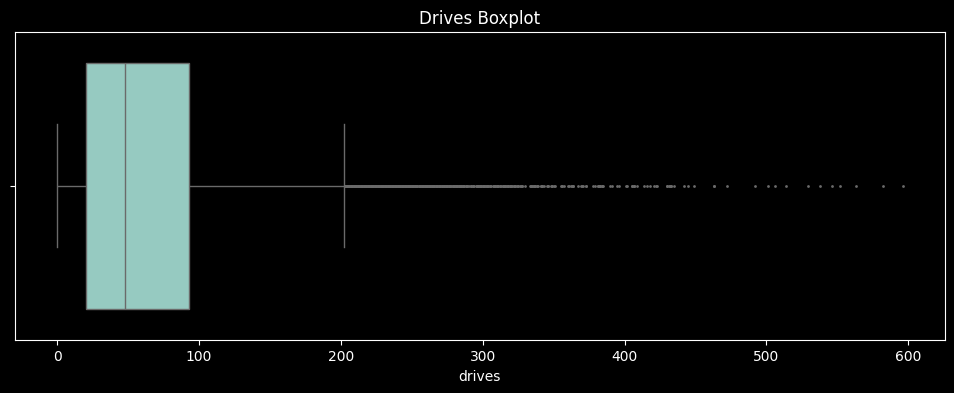

In [235]:
# Boxplot of drives
boxplotter(df, 'drives')

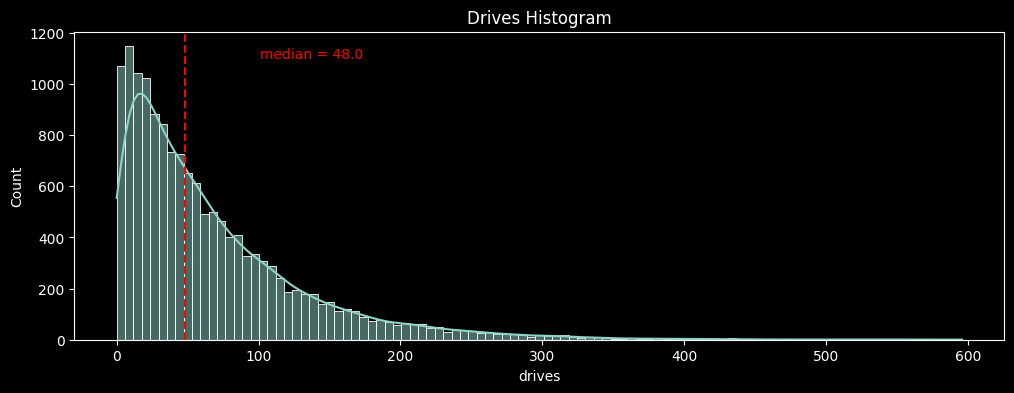

In [236]:
# Histogram of drives
histogrammer(df, 'drives')

* As seen above, the `drives` histogram follows a distribution similar to `sessions` variable. It is a **right-skewed distribution**, approximately **log-normal**, with median of **48**.
* However, as indicated on the boxplot, there are some drivers who had over **400** `drives` during the same period. 

---

##### **4.4.3. A model estimate of the total number of session since a user has onboarded: `total_sessions`** 

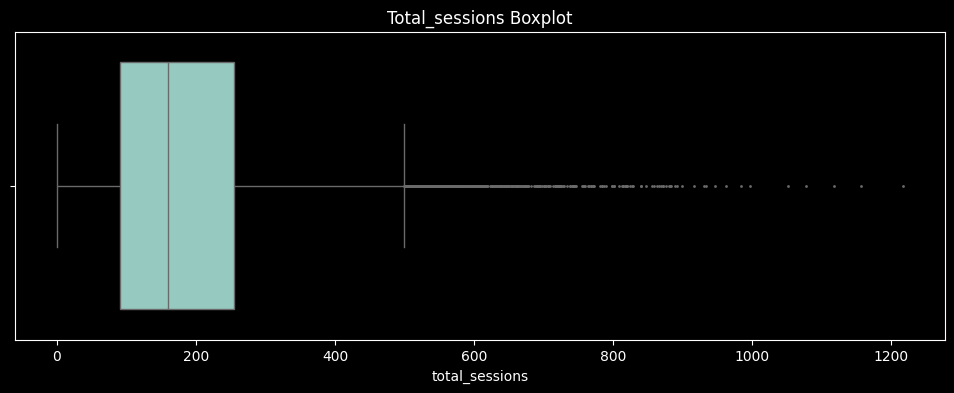

In [237]:
# Box Plot of total sessions:
boxplotter(df, 'total_sessions')

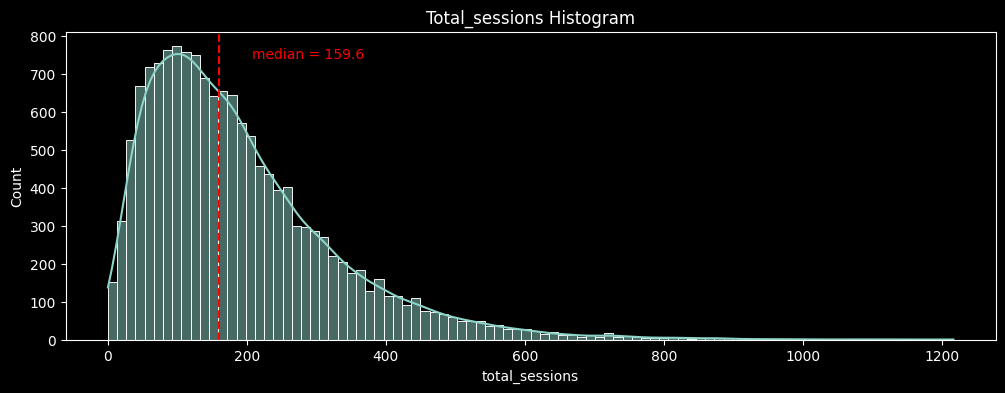

In [238]:
# Histogram of total sessions:
histogrammer(df, 'total_sessions')

* As seen above, the `total_sessions` variable is a **right-skewed distribution**. The median total number of sessions is **159.6**  *(**~160**)*.
* This is interesting information because, if the median of `sessions` was **56** and the median `total_sessions` was **~160**, then it seems that a large proportion of a user's *(estimated)* total `drives` might have taken place in the last month. This is something that may need to be examines more closely later.
---

##### **4.4.4. The number of days since a user signed up for the Waze app: `n_days_after_onboarding`**

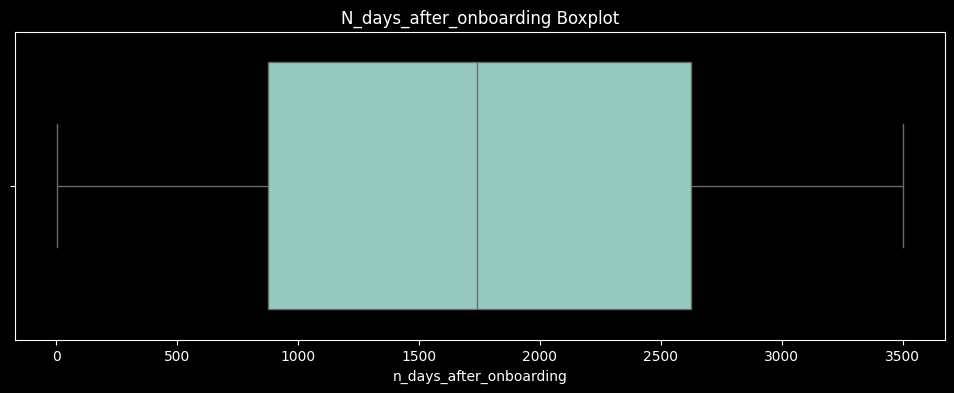

In [240]:
# Box Plot of n_days_after_onboarding:
boxplotter(df, 'n_days_after_onboarding')

Median:  1741.0


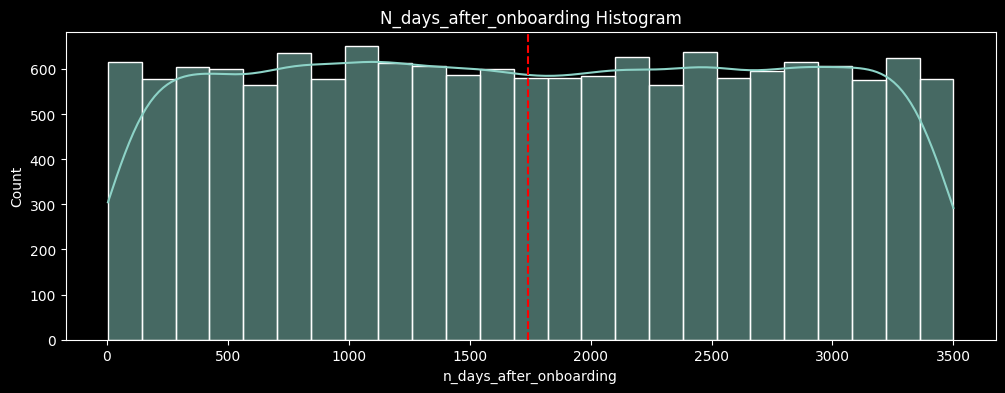

In [243]:
# Histogram of n_days_after_onboarding:
histogrammer(df, 'n_days_after_onboarding', median_text = False)

* The **total user tenure** (i.e., number of days since onboarding) is a **uniform distribution** with values ranging from **near-zero **to **~3,500** *(~9.5 years)*.

---

##### **4.4.5. Total kilometers driven during the month: `driven_km_drives`** 

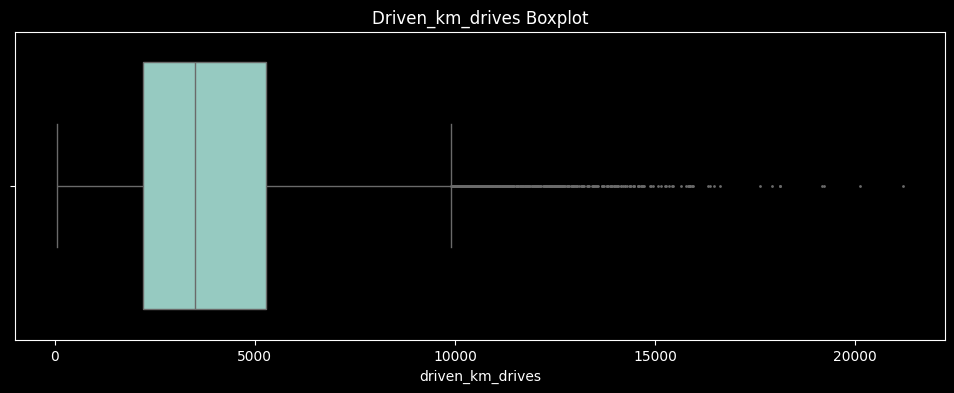

In [244]:
# Boxplot of driven kms per drive:
boxplotter(df, 'driven_km_drives')

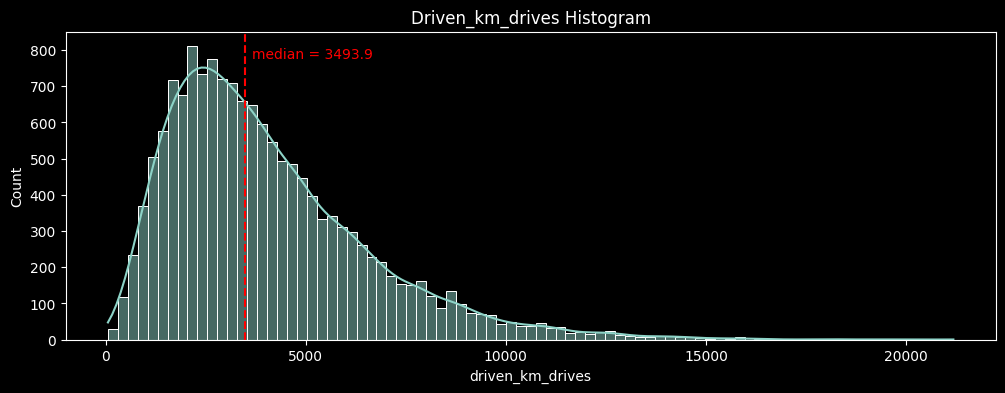

In [245]:
histogrammer(df, 'driven_km_drives')

* As seen above, the `driven_km_drives` variable is a **right-skewed distribution** with half the users driving under **~3494 kms**.
* As we had discovered in the initial EDA, the users in this dataset drives a lot. The longest distance driven in a month being **~21183 kms** whcih is over half the circumference of the earth. 

---

##### **4.4.6. Total duration driven *(in minutes)* during the month: `duration_minutes_drives`** 

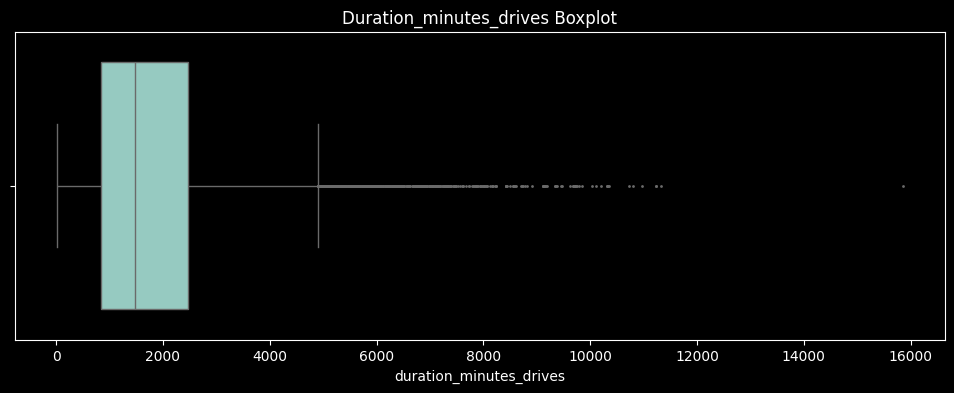

In [247]:
# Boxplot of duration_minutes_drives
boxplotter(df, 'duration_minutes_drives')

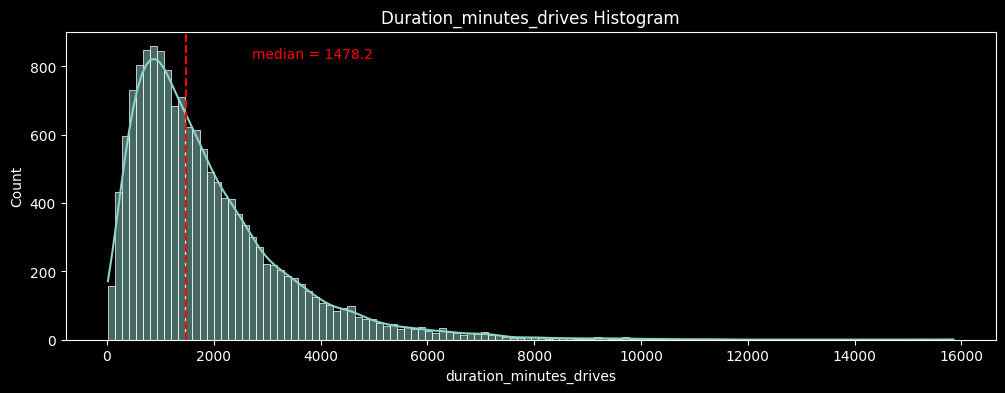

In [248]:
# Histogram of duration_minutes_drives
histogrammer(df, 'duration_minutes_drives')

* The `duration_minutes_drive` variable has a **heavily skewed right tail**. Half of the users drove less than **~1478 minutes** *(~25 hours)*, but some users clocked over **250 hours** over the month. 

---

##### **4.4.7. The number of days the user opens the Waze app during the month: `activity_days`**

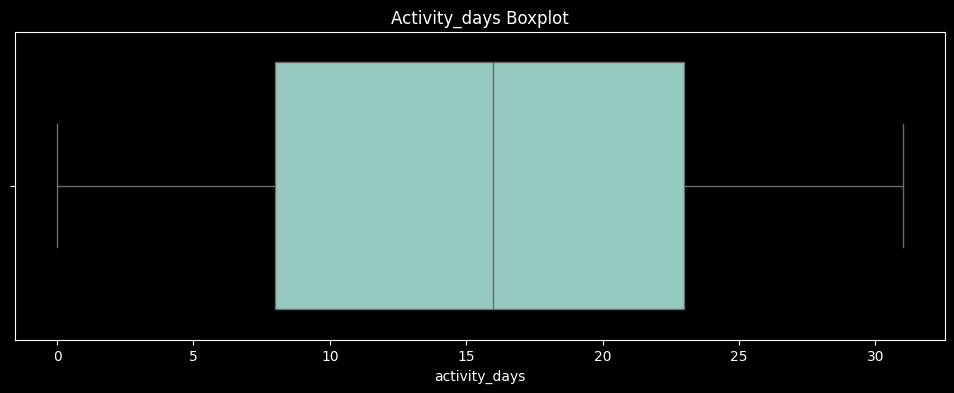

In [251]:
# Boxplot of activity_days
boxplotter(df, 'activity_days')

Median:  16.0


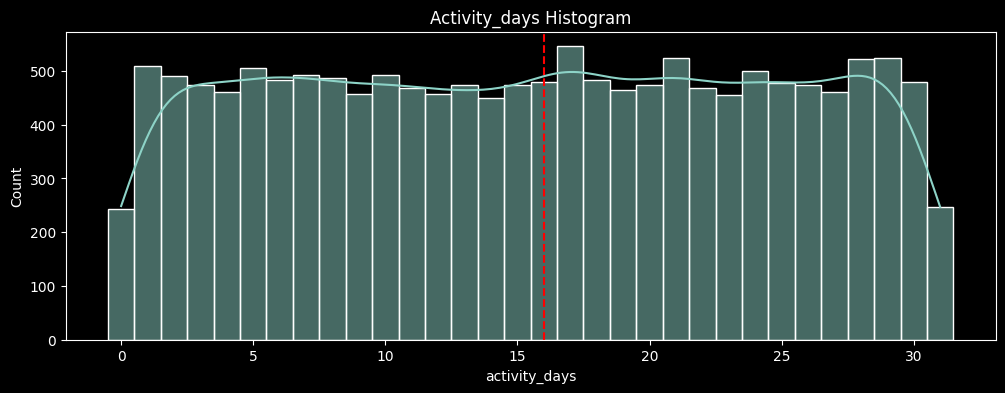

In [253]:
# Histogram of activity_days
histogrammer(df, 'activity_days', median_text=False, discrete = True)


* Within the last month, users opened the Waze app a median of **16 times**.
* The boxplot reveals a **centered distribution**.
* The histogram shows a nearly **uniform distribution** of **~500** people opening the Waze app on each count of days. 
* However, the histogram also shows us that there are **~250** people who did not open the app at all and **~250** people who opened the app every day of the month.
* This distribution is noteworthy because it does mirror the `sessions` distribution, which I think would be closely correlated with `activity_days`.

---

##### **4.4.8. The number of days the user drives *(at least 1 km)* during the month: `driving_days`**
median text false
discrete true

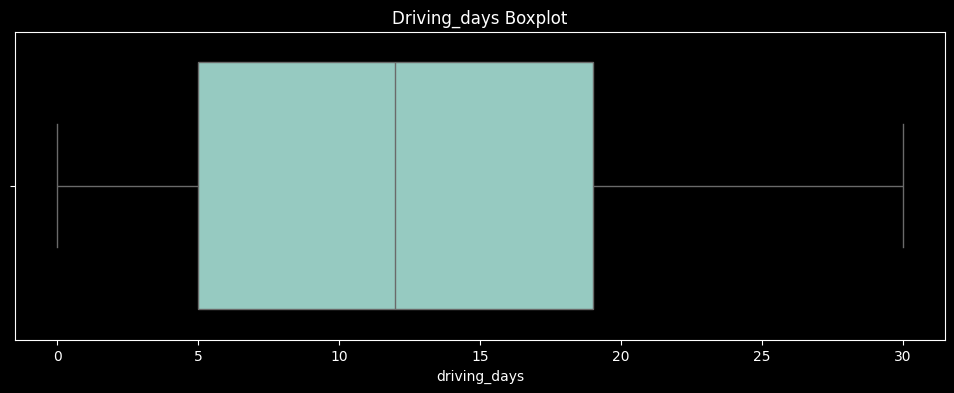

In [254]:
# Boxplot of driving_days
boxplotter(df, 'driving_days')

Median:  12.0


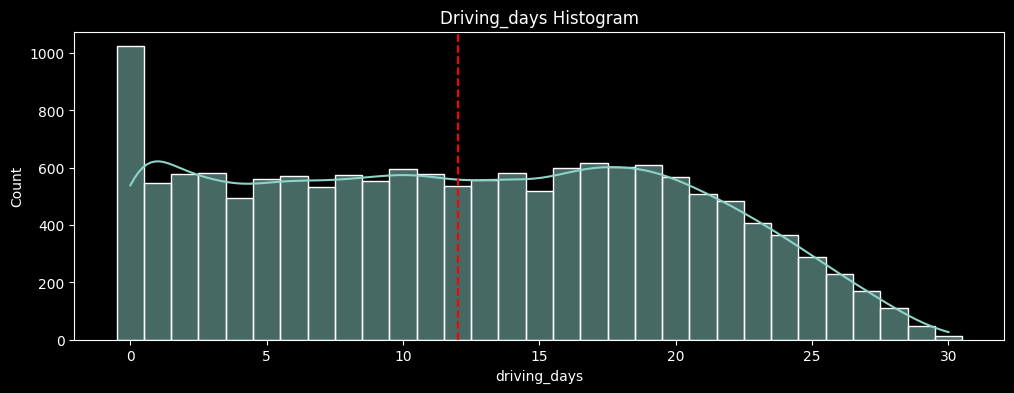

In [255]:
# Histogram of driving_days
histogrammer(df, 'driving_days', median_text=False, discrete = True)

* The number of days users drove each month is **almost uniformly distributed**, and it largely correlates with the number of days they opened the app that month, except the `driving_days` **distribution tails off on the right**
* However, there were almost twice as many users ***(~1000 vs. ~550)*** who did not drive at all during the month. 
* This might be counterintuitive when considered together with the information from `activity_days`. That variable has **~500** users opening the app on each of most of the day counts, but there were only **~250** users who did not open the app at all during the month and **~250** users who opened the app every days.


**Flagging this for further investigation later!**

---

##### **4.4.9. Type of device a user starts a session with: `device`**

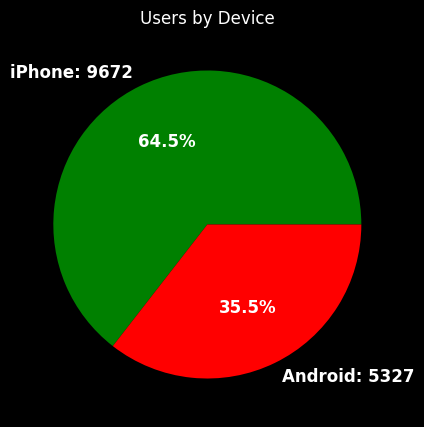

In [ ]:
# Pie Chart of device type
fig = plt.figure(figsize=(5,5))
data =  df['device'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
               f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%', 
        colors=['g', 'r'], 
        textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'}
        )


plt.title('Users by Device', color='white'); 

* There are nearly twice as many `iPhone` users as `Android` users represented in this data.

---

##### **4.4.10 Binary target variable (`retained` vs `churned`) for if a user has churned anytime during the course of the month: `label`**

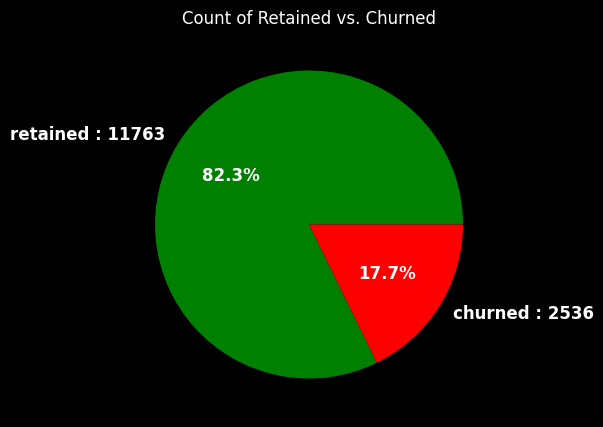

In [296]:
data = df['label'].value_counts()
fig = plt.figure(figsize = (5,5))

plt.pie(data, labels = [f'{data.index[0]} : {data.values[0]}',
                        f'{data.index[1]} : {data.values[1]}'],
                        autopct='%1.1f%%',
                        colors=['g', 'r'],
                        textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'}
                        )

plt.title('Count of Retained vs. Churned', color='white'); 

* Less than **18%** of the users `churned`.

---

##### **4.4.11 `driving_days` vs. `activity_days`**
As both `driving_days` and `activity_days` represent the **counts of days** over a month and they are also closely related, we can plot them together on a single histogram.

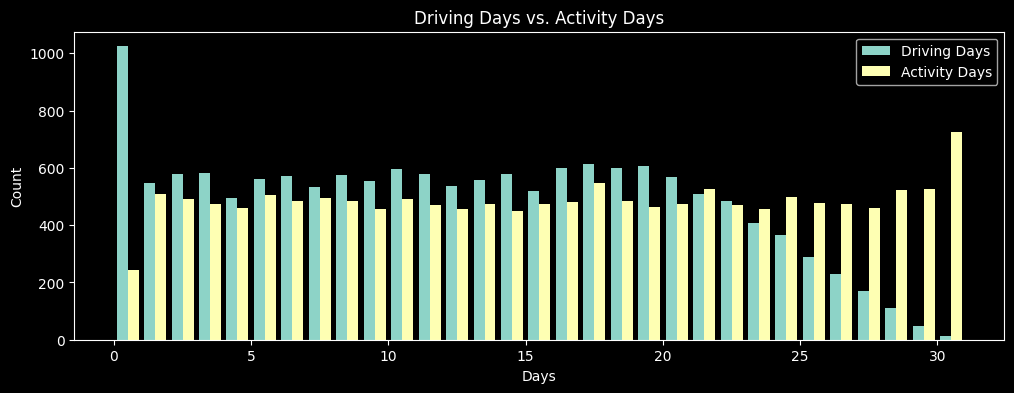

In [312]:
# Histogram of driving_days vs. activity_days
fig = plt.figure(figsize=(12,4))
label = ['Driving Days', 'Activity Days']
plt.hist(df[['driving_days', 'activity_days']],
         bins = range(0,32),
         label = label)

plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Driving Days vs. Activity Days')
plt.legend();

* As observed previously, this might be counterintuitive. After all, why are there *fewer* users who did not use the app at all during the month and *more* users who did not drive at all during the month. Looks inversely related.
* On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they are not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.
* Nonetheless, it might be worthwhile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not same between variables. To confirm this let me find the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [313]:
# Printing the maximum number of days for driving_days and activity_days
df[['driving_days', 'activity_days']].max()

driving_days     30
activity_days    31
dtype: int64

It as suspected. `activity_days` has data point for 1 day more than `driving_days'. 

* Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.


* One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing `driving_days` and the y-axis representing `activity_days`.

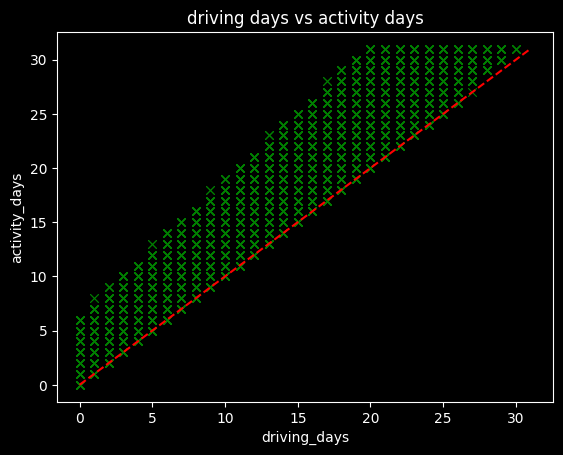

In [342]:
# Scatter plot of driving_days vs. activity_days
sns.scatterplot(data = df, x= 'driving_days', y='activity_days', c='g', marker= 'x');
plt.title('driving days vs activity days')
plt.plot([0,31],[0,31], color='r', linestyle='--');

* Looks like there is a theoretical limit. If you use the app to drive, then by definition it much count as a day-use as well. In other words, you cannot have more `drive_days` than `activity_days`. 
* None of the samples in this data violates this rule, which is good. 

#### 5. Descriptive Statistics
- Summary tables
- Grouped analysis (e.g., churned vs retained)

#### 6. Visualizations
- Histograms, box plots
- Churn by categorical features
- Correlation heatmap

#### 7. Hypothesis Testing
- Assumptions checked
- Test(s) used (t-test, chi-square, etc.)
- Result interpretation in plain language

### Construct Stage

#### 8. Modeling: Logistic Regression
- Feature selection and encoding
- Model training
- Coefficient interpretation

#### 9. Modeling: Classification with Scikit-learn
- Model 1: Logistic Regression (with sklearn)
- Model 2: Random Forest (or another tree-based method)
- Model evaluation: Accuracy, Precision, Recall, F1, ROC-AUC

### Execute Stage

#### 10. Model Evaluation
- Confusion matrix and metrics
- Feature importance
- Business interpretation of model output

#### 11. Recommendations
- Actionable insights for Waze (targeted retention, app improvements)
- What Waze should do based on your findings

#### 12. Limitations & Next Steps
- Data issues, modeling limits
- What future data could improve results


## Appendix
- Additional code
- Charts or outputs not central to the main story